In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [ ]:
df.shape

(50000, 4097)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0.309804,0.447059,0.486275,0.494118,0.490196,0.486275,0.490196,0.486275,0.482353,0.490196,...,0.352941,0.364706,0.352941,0.341176,0.349020,0.345098,0.337255,0.345098,0.360784,0
1,0.505882,0.352941,0.298039,0.333333,0.337255,0.341176,0.349020,0.352941,0.352941,0.352941,...,0.341176,0.325490,0.325490,0.329412,0.333333,0.321569,0.345098,0.337255,0.321569,0
2,0.290196,0.380392,0.450980,0.450980,0.447059,0.458824,0.450980,0.443137,0.443137,0.450980,...,0.364706,0.368627,0.349020,0.356863,0.364706,0.360784,0.345098,0.345098,0.329412,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0


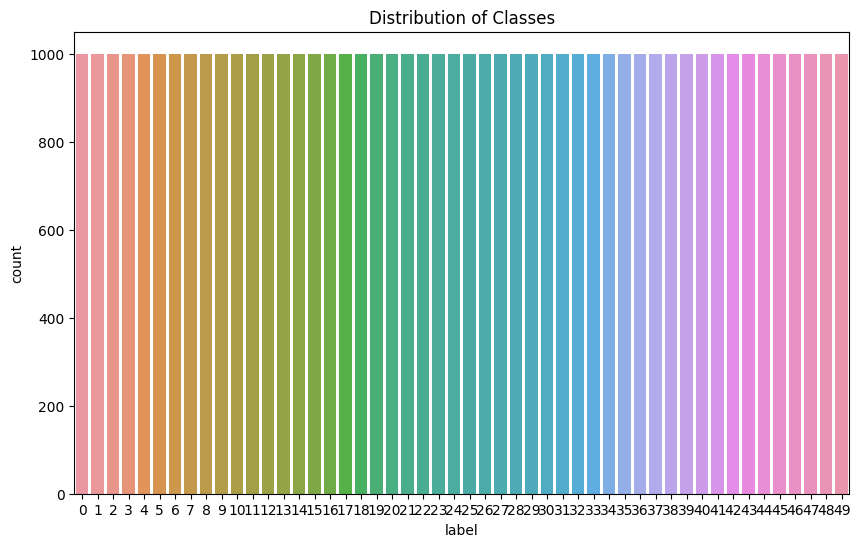

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Classes')
plt.show()


In [ ]:
X = df.drop(columns=['label']).values
y = df['label'].values

image_width, image_height = 64, 64
X = X.reshape(-1, image_width, image_height, 1)


number_of_classes = 50
y = to_categorical(y, num_classes=number_of_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)





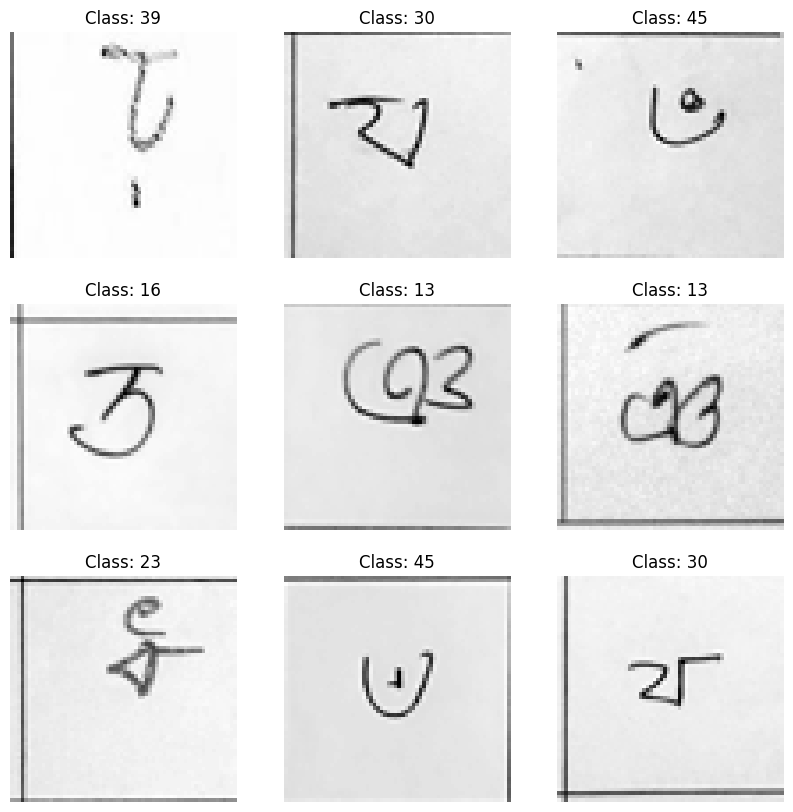

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(image_width, image_height), cmap='gray')
    plt.title(f'Class: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())


In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(number_of_classes, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
def lr_scheduler(epoch, lr):
    return lr * 0.95

lr_schedule = LearningRateScheduler(lr_scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[lr_schedule, early_stopping],
    verbose=1
)


Epoch 1/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.7170 - accuracy: 0.7673 - val_loss: 0.5812 - val_accuracy: 0.8332 - lr: 9.5000e-04
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6300 - accuracy: 0.7969 - val_loss: 0.5441 - val_accuracy: 0.8488 - lr: 9.0250e-04
Epoch 3/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.5776 - accuracy: 0.8116 - val_loss: 0.5161 - val_accuracy: 0.8606 - lr: 8.5737e-04
Epoch 4/10
2500/2500 [==============================] - 16s 7ms/step - loss: 0.5316 - accuracy: 0.8278 - val_loss: 0.5155 - val_accuracy: 0.8576 - lr: 8.1451e-04
Epoch 5/10
2500/2500 [==============================] - 20s 8ms/step - loss: 0.4828 - accuracy: 0.8427 - val_loss: 0.4861 - val_accuracy: 0.8654 - lr: 7.7378e-04
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.4600 - accuracy: 0.8472 - val_loss: 0.4913 - val_accuracy: 0.8682 - lr: 7.3509e-04
Epoch 7/10
2500/2500 [======

In [ ]:
model.save('/content/drive/MyDrive/cse438_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


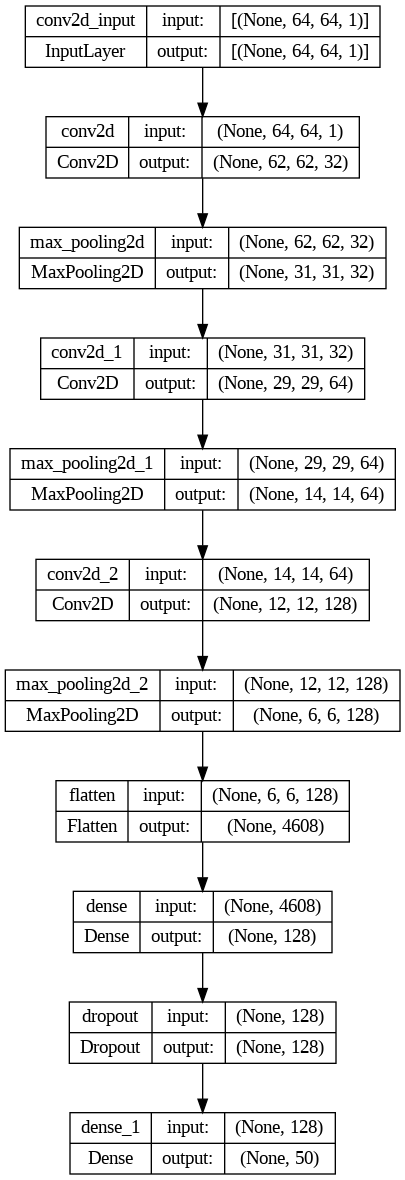

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
X_test = X_test.reshape(-1, image_width, image_height, 1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


y_pred = model.predict(X_test)


y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)




# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)


# Accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'\nAccuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')


Test Loss: 0.5496
Test Accuracy: 0.8556
157/157 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        99
           1       0.95      0.83      0.89       107
           2       0.95      0.81      0.88       117
           3       0.81      0.91      0.85        97
           4       0.65      0.75      0.70        93
           5       0.91      0.79      0.85       102
           6       0.74      0.70      0.72       105
           7       0.86      0.85      0.85       111
           8       0.84      0.87      0.86       100
           9       0.89      0.91      0.90       101
          10       0.90      0.80      0.85        80
          11       0.96      0.87      0.91        90
          12       0.97      0.93      0.95       104
          13       0.94      0.92      0.93        95
          14       0.84      0.89      0.86       109
          15    

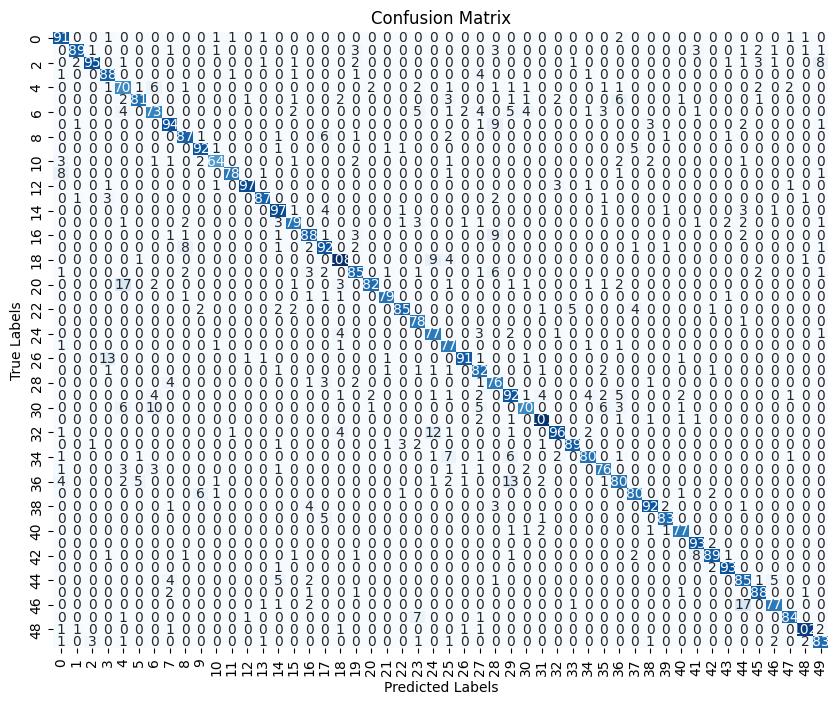

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

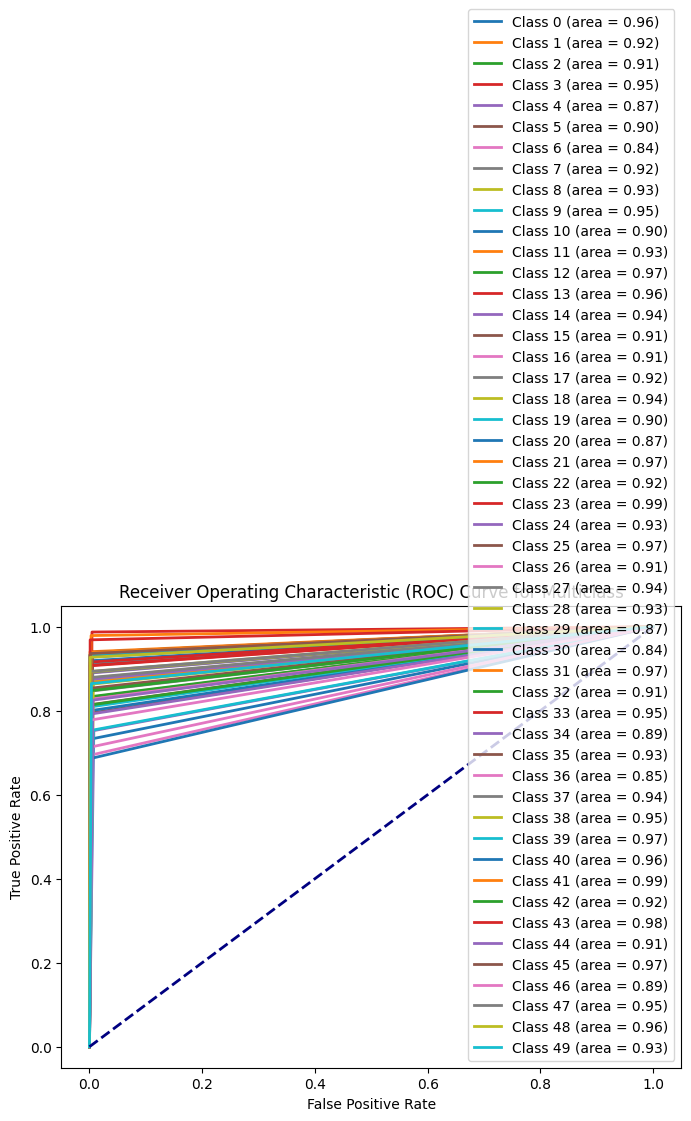

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


y_test_bin = label_binarize(y_test_classes, classes=range(number_of_classes))
y_pred_bin = label_binarize(y_pred_classes, classes=range(number_of_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(number_of_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(number_of_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


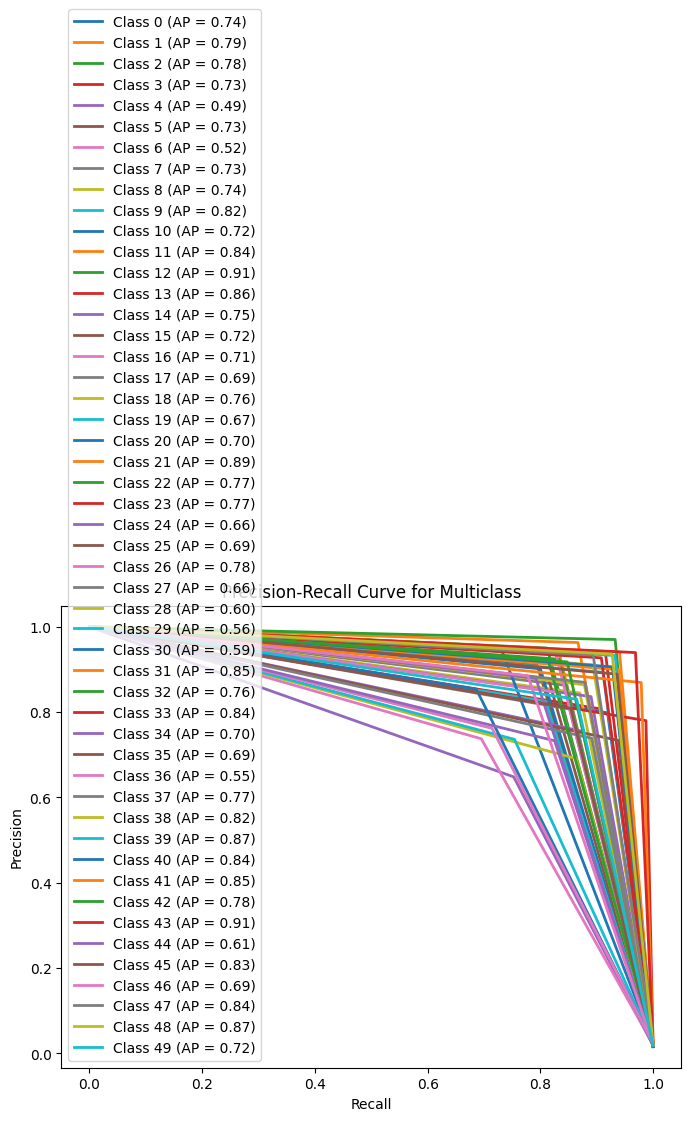

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score


y_test_bin = label_binarize(y_test_classes, classes=range(number_of_classes))
y_pred_bin = label_binarize(y_pred_classes, classes=range(number_of_classes))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(number_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])


plt.figure(figsize=(8, 6))
for i in range(number_of_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc="lower left")
plt.show()

